In [1]:
import numpy as np
from PIL import Image, ImageFilter, ImageMath
import time
import matplotlib.pyplot as plt

In [5]:
def grain(size):
    gauss = Image.new("L", (size,size))
    gauss.putdata(np.random.randn(size**2)*255)
    gauss = gauss.resize((1024,1024))
    gauss = Image.blend(gauss, gauss.filter(ImageFilter.GaussianBlur(2)), 1)
    gauss = gauss.filter(ImageFilter.SHARPEN)
    return gauss

In [14]:
start = time.time()
imgarray = []
for i in range(1000):
    size = int(np.clip(np.random.randn()*200+700, a_min=400, a_max=1024))
    img = grain(size)
    img.save('{:s}/{:06d}.jpg'.format("grains", i))
end = time.time()
(end - start)

110.76460599899292

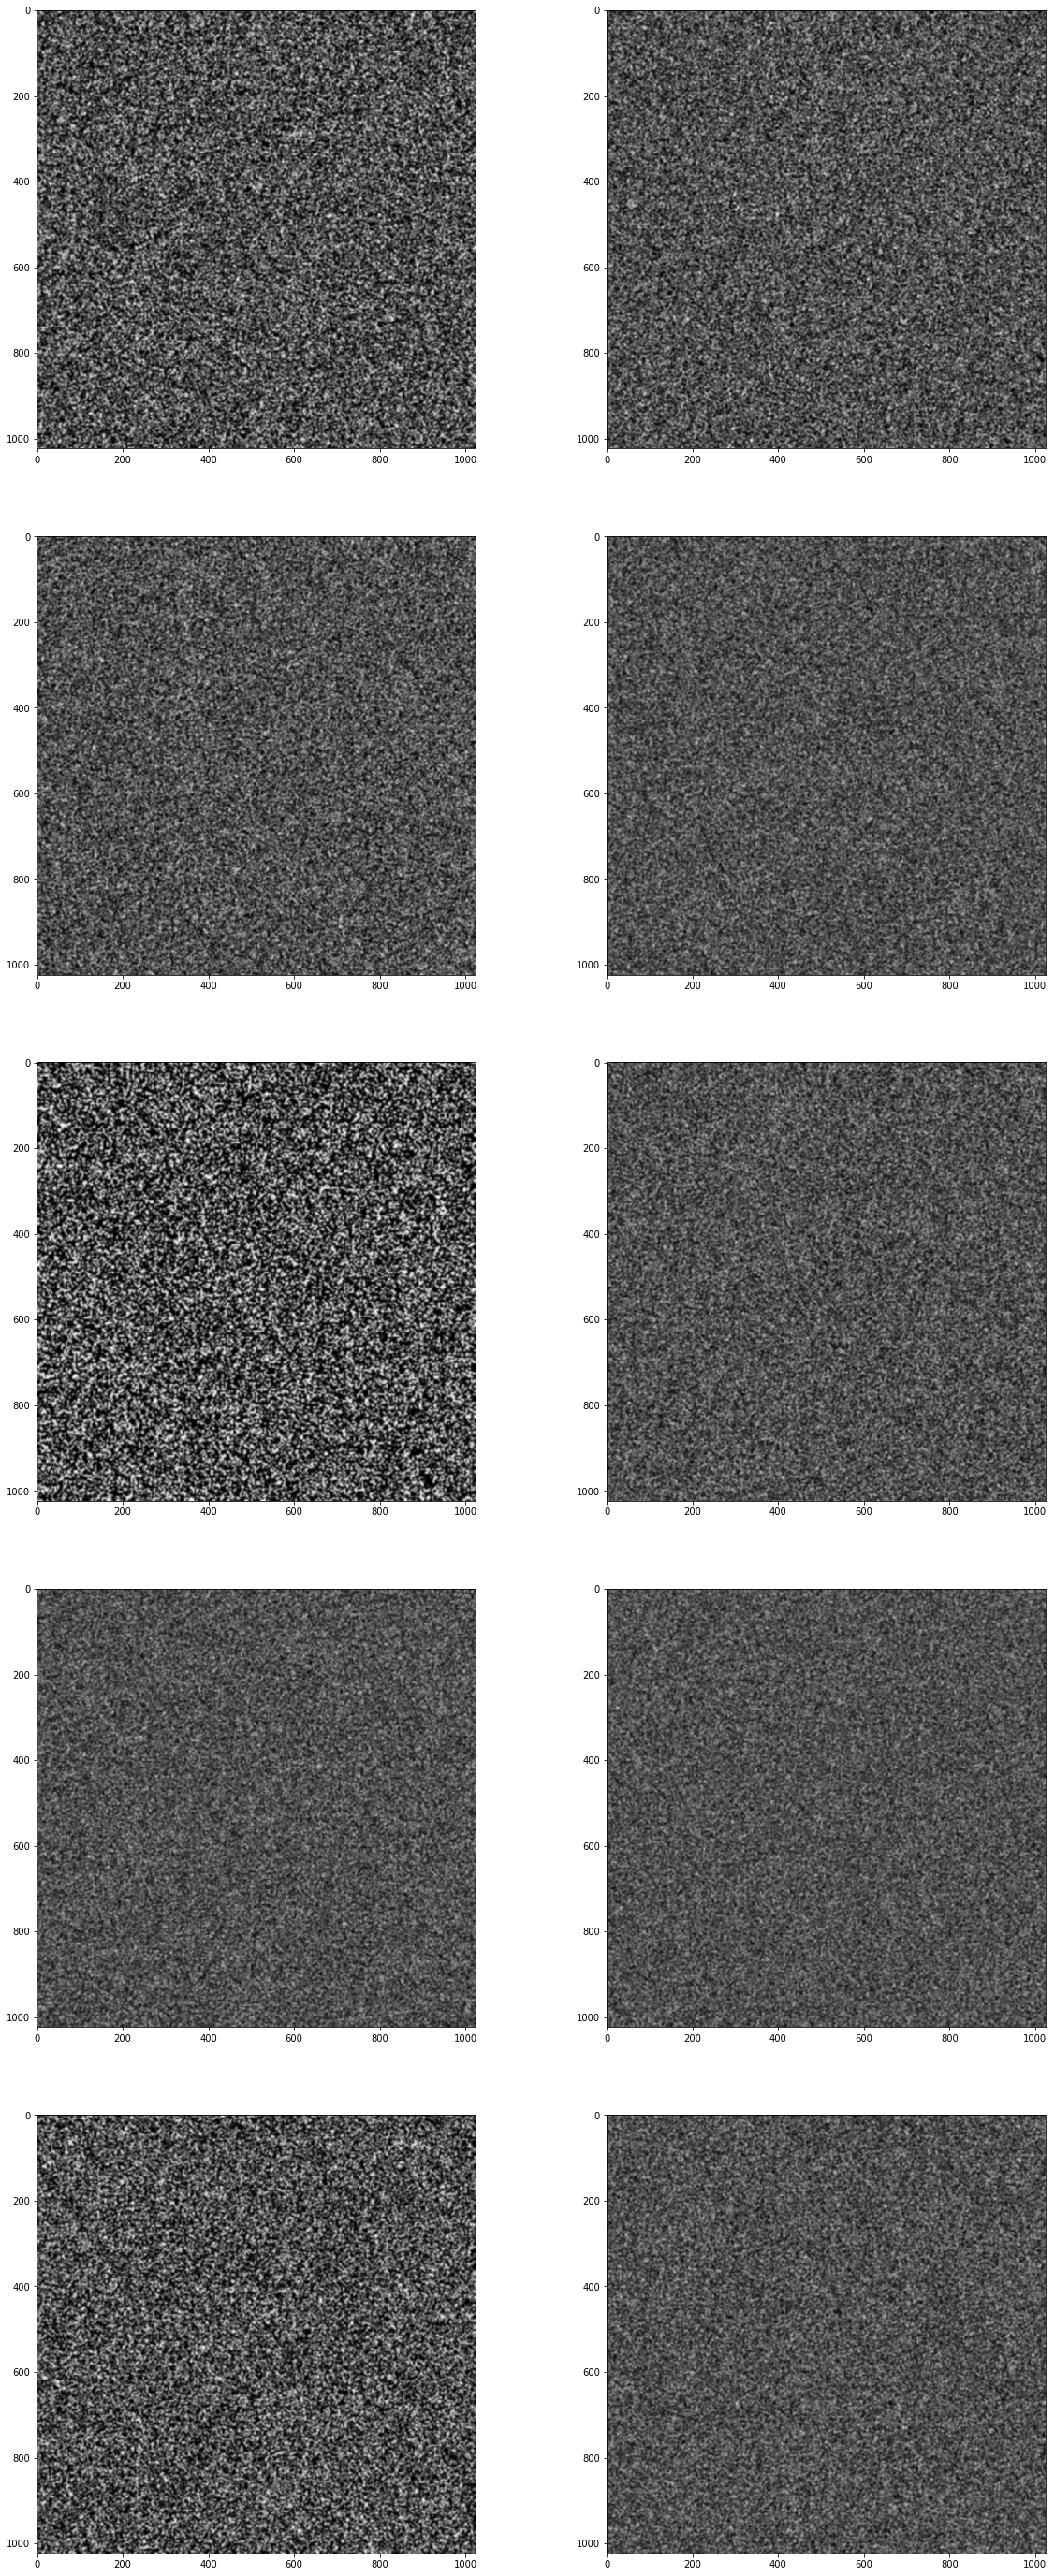

In [11]:
f, axarr = plt.subplots(5, 2, figsize=(20,50))
axarr = axarr.ravel()
for i in range(10):
    axarr[i].imshow(imgarray[i])
plt.show()